In [1]:
!pip install pandas-datareader

import pandas_datareader as pdr
import datetime
import pandas

In [13]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2020, 7, 1))

In [15]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800.0,9.241351
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200.0,9.145061
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700.0,9.305547
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800.0,9.237648
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700.0,9.162347


In [16]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.183380
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,352.993561
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.128876
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.143433
2020-07-01,367.359985,363.910004,365.119995,364.109985,27684300.0,363.454681


In [18]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3461.000000,3461.000000,3461.000000,3461.000000,3.461000e+03,3461.000000
mean,96.697357,94.794107,95.735232,95.787472,1.081175e+08,90.037328
std,74.420527,72.931161,73.588366,73.741707,9.646447e+07,73.857773
min,10.568571,10.371428,10.488571,10.461429,1.136200e+07,9.040131
25%,32.142857,31.450001,31.975714,31.977142,3.562770e+07,27.632708
50%,81.312859,79.761429,80.545715,80.404289,7.831250e+07,70.510078
75%,131.949997,129.899994,130.690002,130.559998,1.494451e+08,121.231003
max,372.380005,363.910004,365.119995,366.529999,8.432424e+08,365.870331


In [19]:
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=3461, freq=None)

In [21]:
ts = aapl['Close'][-10:]
ts

Date
2020-06-18    351.730011
2020-06-19    349.720001
2020-06-22    358.869995
2020-06-23    366.529999
2020-06-24    360.059998
2020-06-25    364.839996
2020-06-26    353.630005
2020-06-29    361.779999
2020-06-30    364.799988
2020-07-01    364.109985
Name: Close, dtype: float64

In [22]:
type(ts)

pandas.core.series.Series

In [23]:
aapl.asfreq("M", method="bfill")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,11.668571,11.461429,11.635715,11.582857,125368600.0,10.009202
2006-11-30,13.240000,13.008572,13.172857,13.094286,217621600.0,11.315289
2006-12-31,12.368571,11.700000,12.327143,11.971429,309579900.0,10.344985
2007-01-31,12.285714,12.050000,12.122857,12.247143,214017300.0,10.583235
2007-02-28,12.228572,11.857142,11.857142,12.087143,229868800.0,10.444975
...,...,...,...,...,...,...
2020-02-29,301.440002,277.720001,282.279999,298.809998,85349300.0,297.466949
2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,253.147079
2020-04-30,294.529999,288.350006,289.959991,293.799988,45457600.0,292.479492


In [28]:
aapl['diff'] = aapl.Open - aapl.Close
del aapl['diff']

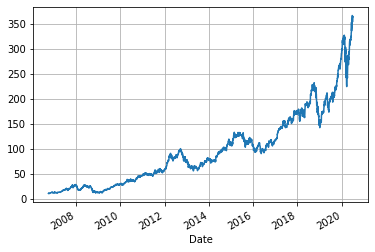

In [30]:
import matplotlib.pyplot as plt

aapl['Close'].plot(grid=True)

plt.show()

In [37]:
import numpy as np

# Assign `Adj Close` to `daily_close`
daily_close = aapl['Adj Close']

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

Date
2006-10-02    0.000000
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007297
2006-10-06   -0.008152
                ...   
2020-06-25    0.013276
2020-06-26   -0.030726
2020-06-29    0.023047
2020-06-30    0.008348
2020-07-01   -0.001891
Name: Adj Close, Length: 3461, dtype: float64
Date
2006-10-02         NaN
2006-10-03   -0.010474
2006-10-04    0.017397
2006-10-05   -0.007323
2006-10-06   -0.008185
                ...   
2020-06-25    0.013188
2020-06-26   -0.031208
2020-06-29    0.022785
2020-06-30    0.008313
2020-07-01   -0.001893
Name: Adj Close, Length: 3461, dtype: float64


In [41]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


In [42]:
# A way to calculate daily percentage shift with .shift() instead of pct_change()
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007297
2006-10-06   -0.008152
                ...   
2020-06-25    0.013276
2020-06-26   -0.030726
2020-06-29    0.023047
2020-06-30    0.008348
2020-07-01   -0.001891
Name: Adj Close, Length: 3461, dtype: float64


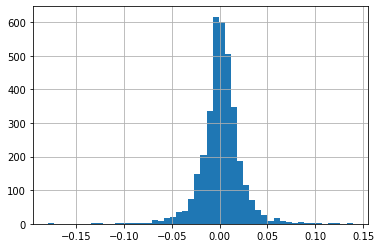

count    3460.000000
mean        0.001268
std         0.020264
min        -0.179195
25%        -0.007864
50%         0.001035
75%         0.011346
max         0.139049
Name: Adj Close, dtype: float64


In [43]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics to correctly interpret graph
print(daily_pct_change.describe())

The *cumulative daily rate of return* is useful to determine the value of an investment at regular intervals. You can calculate the cumulative daily rate of return by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values:


In [44]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

Date
2006-10-02          NaN
2006-10-03     0.989581
2006-10-04     1.006947
2006-10-05     0.999599
2006-10-06     0.991451
                ...    
2020-06-25    39.408023
2020-06-26    38.197181
2020-06-29    39.077498
2020-06-30    39.403701
2020-07-01    39.329171
Name: Adj Close, Length: 3461, dtype: float64


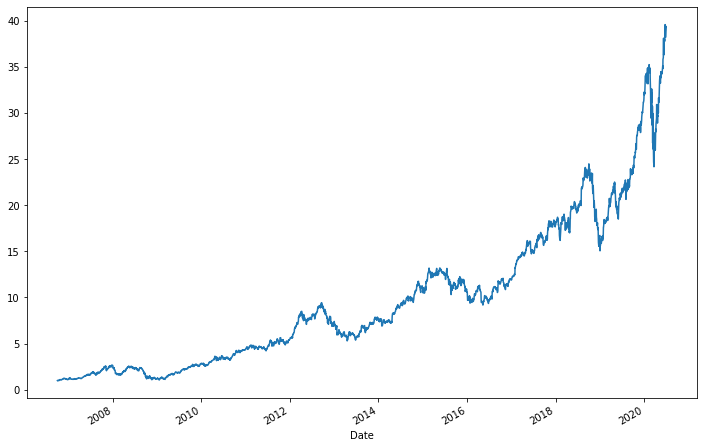

In [46]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [47]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

Date
2006-10-31     1.031710
2006-11-30     1.140058
2006-12-31     1.155110
2007-01-31     1.187303
2007-02-28     1.145176
                ...    
2020-03-31    28.271247
2020-04-30    29.342239
2020-05-31    33.461300
2020-06-30    37.352113
2020-07-31    39.329171
Freq: M, Name: Adj Close, Length: 166, dtype: float64


In [53]:
import pandas as pd

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2020, 7, 1))

In [54]:
all_data

High          Low         Open        Close  \
Ticker Date                                                             
AAPL   2006-10-02    10.838572    10.614285    10.728572    10.694285   
       2006-10-03    10.707143    10.455714    10.635715    10.582857   
       2006-10-04    10.780000    10.451428    10.585714    10.768572   
       2006-10-05    10.880000    10.590000    10.647142    10.690000   
       2006-10-06    10.720000    10.544286    10.631429    10.602858   
...                        ...          ...          ...          ...   
GOOG   2020-06-25  1442.900024  1420.000000  1429.900024  1441.329956   
       2020-06-26  1433.449951  1351.989990  1431.390015  1359.900024   
       2020-06-29  1395.599976  1347.010010  1358.180054  1394.969971   
       2020-06-30  1418.650024  1383.959961  1390.439941  1413.609985   
       2020-07-01  1443.000000  1409.819946  1411.099976  1438.040039   

                        Volume    Adj Close  
Ticker Date                                  
AAPL   2006-10-02  178159800.0     9.241351  
       2006-10-03  197677200.0     9.145061  
       2006-10-04  207270700.0     9.305547  
       2006-10-05  170970800.0     9.237648  
       2006-10-06  116739700.0     9.162347  
...                        ...          ...  
GOOG   2020-06-25    1230500.0  1441.329956  
       2020-06-26    4267700.0  1359.900024  
       2020-06-29    1810200.0  1394.969971  
       2020-06-30    2042400.0  1413.609985  
       2020-07-01    1775200.0  1438.040039  

[13844 rows x 6 columns]

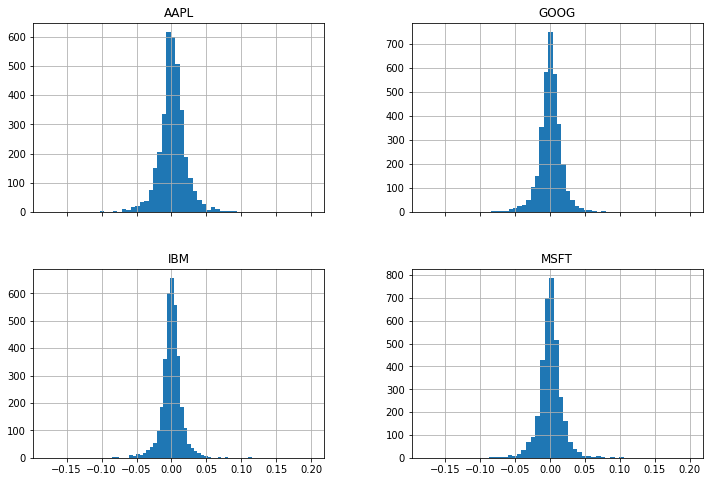

Ticker,AAPL,GOOG,IBM,MSFT
count,3460.000000,3460.000000,3460.000000,3460.000000
mean,0.001268,0.000740,0.000331,0.000827
std,0.020264,0.018478,0.014933,0.017772
min,-0.179195,-0.116091,-0.128507,-0.147390
25%,-0.007864,-0.007099,-0.006326,-0.007254
50%,0.001035,0.000533,0.000483,0.000534
75%,0.011346,0.009187,0.007419,0.008857
max,0.139049,0.199915,0.115150,0.186046


In [56]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()
daily_pct_change.describe()

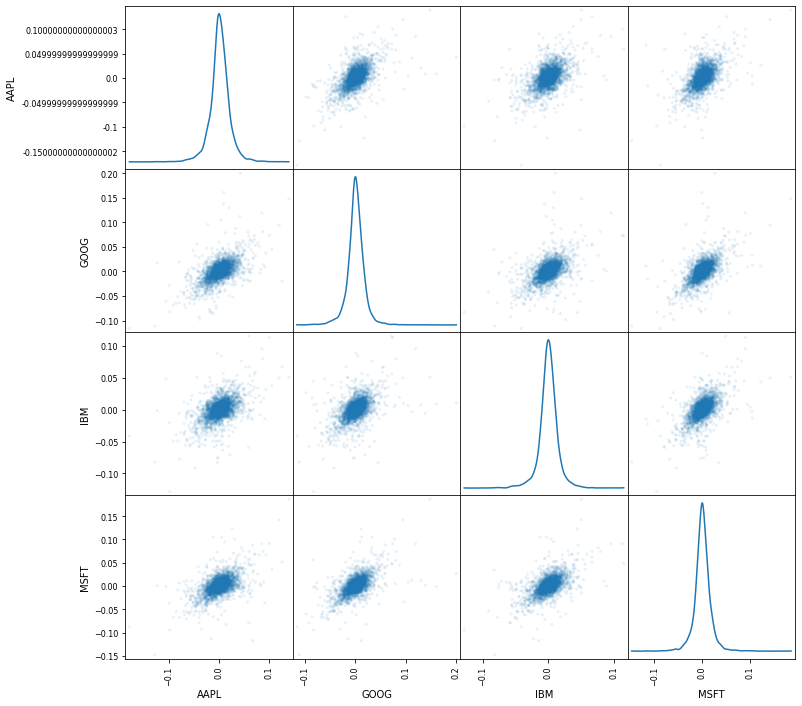

In [61]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

H1 Moving Windows

*Moving windows* are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.

In [62]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Date
2020-06-18    314.929686
2020-06-19    316.812104
2020-06-22    318.725253
2020-06-23    320.824579
2020-06-24    322.876682
2020-06-25    324.820346
2020-06-26    326.333198
2020-06-29    328.167151
2020-06-30    329.974677
2020-07-01    331.655479
Name: Adj Close, dtype: float64


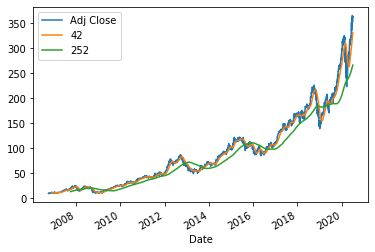

In [66]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

# Show plot
plt.show()

# Volatility Calculation

The ***volatility of a stock*** is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

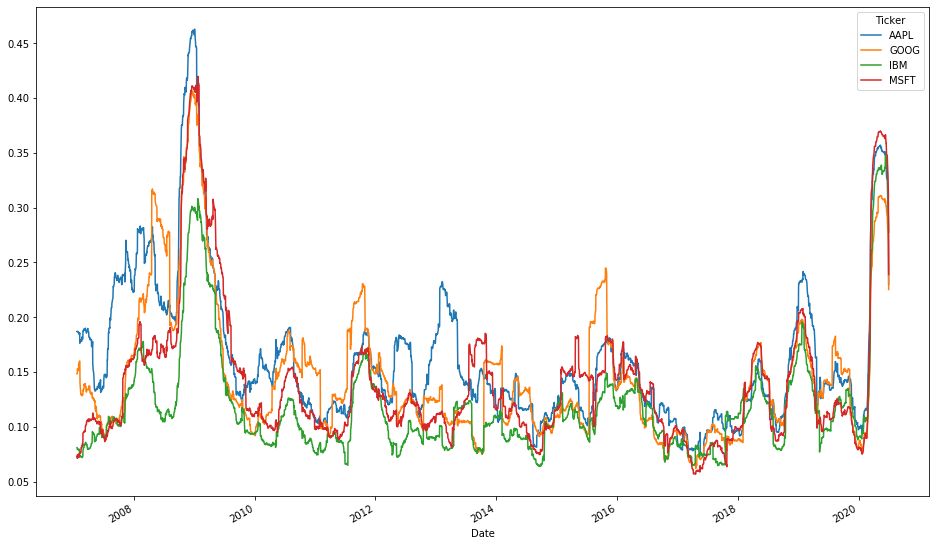

In [71]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(16, 10))

# Show the plot
plt.show()

# Ordinary Least-Squares Regression (OLS)

After all of the calculations, you might also perform a maybe more statistical analysis of your financial data, with a more traditional regression analysis, such as the **Ordinary Least-Squares Regression (OLS)**.

To do this, you have to make use of the statsmodels library, which not only provides you with the classes and functions to estimate many different statistical models but also allows you to conduct statistical tests and perform statistical data exploration

In [73]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm


# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     1395.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          7.46e-257
Time:                        12:20:25   Log-Likelihood:                 9629.3
No. Observations:                3460   AIC:                        -1.925e+04
Df Residuals:                    3458   BIC:                        -1.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.677      0.4

**Things to look out for when you’re studying the result of the model summary are the following:**

The *Dep. Variable*, which indicates which variable is the response in the model

The *Model*, in this case, is OLS. It’s the model you’re using in the fit

Additionally, you also have the Method to indicate how the parameters of the model were calculated. In this case, you see that this is set at *Least Squares*.

# The right column gives you some more insight into the goodness of the fit. You see, for example:

*R-squared*, which is the coefficient of determination. This score indicates how well the regression line approximates the real data points. In this case, the result is 0.280. In percentages, this means that the score is at 28%. When the score is 0%, it indicates that the model explains none of the variability of the response data around its mean. Of course, a score of 100% indicates the opposite.

You also see the *Adj. R-squared score*, which at first sight gives the same number. However, the calculation behind this metric adjusts the R-Squared value based on the number of observations and the degrees-of-freedom of the residuals (registered in DF Residuals). The adjustment in this case hasn’t had much effect, as the result of the adjusted score is still the same as the regular R-squared score.

The *F-statistic* measures how significant the fit is. It is calculated by dividing the mean squared error of the model by the mean squared error of the residuals. The F-statistic for this model is 514.2.

Next, there’s also the *Prob (F-statistic)*, which indicates the probability that you would get the result of the F-statistic, given the null hypothesis that they are unrelated.

The *Log-likelihood* indicates the log of the likelihood function, which is, in this case 3513.2.

The *AIC is the Akaike Information Criterion*: this metric adjusts the log-likelihood based on the number of observations and the complexity of the model. The AIC of this model is -7022.

Lastly, the *BIC or the Bayesian Information Criterion*, is similar to the AIC that you just have seen, but it penalizes models with more parameters more severely. Given the fact that this model only has one parameter (check DF Model), the BIC score will be the same as the AIC score.

# Below the first part of the model summary, you see reports for each of the model’s coefficients:

The estimated value of the *coefficient* is registered at coef.

*std err* is the standard error of the estimate of the coefficient.

There’s also the *t-statistic value*, which you’ll find under t. This metric is used to measure how statistically significant a coefficient is.

P > |t| indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. In this case, you see that the constant has a value of 0.198, while AAPL is set at 0.000.

# Lastly, there is a final part of the model summary in which you’ll see other statistical tests to assess the distribution of the residuals:

*Omnibus*, which is the Omnibus D’Angostino’s test: it provides a combined statistical test for the presence of skewness and kurtosis.

*The Prob*(Omnibus) is the Omnibus metric turned into a probability.

Next, the *Skew or Skewness* measures the symmetry of the data about the mean.

The *Kurtosis* gives an indication of the shape of the distribution, as it compares the amount of data close to the mean with those far away from the mean (in the tails).

*Durbin-Watson* is a test for the presence of autocorrelation, and the Jarque-Bera is another test of the skewness and kurtosis. You can also turn the result of this test into a probability, as you can see in Prob (JB).

Lastly, you have the Cond. No, which tests the multicollinearity.

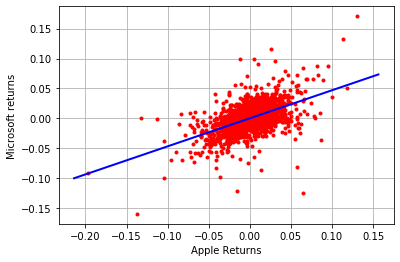

In [74]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

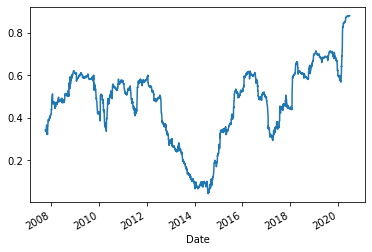

In [75]:
# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

# Common Trading Strategies

The ***Momentum Strategy*** is also called divergence or trend trading. When you follow this strategy, you do so because you believe the movement of a quantity will continue in its current direction. Stated differently, you believe that stocks have momentum or upward or downward trends, that you can detect and exploit.

**Some examples of this strategy are the moving average crossover, the dual moving average crossover, and turtle trading:**

+ The moving average crossover is when the price of an asset moves from one side of a moving average to the other. This crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market. You’ll see an example of this strategy, which is the “hello world” of quantitative trading later on in this tutorial.

+ The dual moving average crossover occurs when a short-term average crosses a long-term average. This signal is used to identify that momentum is shifting in the direction of the short-term average. A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it.

+ Turtle trading is a popular trend following strategy that was initially taught by Richard Dennis. The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

## The Reversion Strategy,

Also known as *convergence or cycle trading*. This strategy departs from the belief that the movement of a quantity will eventually reverse. This might seem a little bit abstract, but will not be so anymore when you take the example. Take a look at the **mean reversion strategy**, where you actually believe that stocks return to their mean and that you can exploit when it deviates from that mean.

That already sounds a whole lot more practical, right?

Another example of this strategy, besides the mean reversion strategy, is the **pairs trading mean-reversion**, which is similar to the mean reversion strategy. Whereas the mean reversion strategy basically stated that stocks return to their mean, ***the pairs trading strategy extends this and states that if two stocks can be identified that have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other***. That means that if the correlation between two stocks has decreased, the stock with the higher price can be considered to be in a short position. It should be sold because the higher-priced stock will return to the mean. The lower-priced stock, on the other hand, will be in a long position because the price will rise as the correlation will return to normal.

### Steps for the moving average crossover

1. First define your two different lookback periods: a short window and a long window. You set up two variables and assign one integer per variable. Make sure that the integer that you assign to the short window is shorter than the integer that you assign to the long window variable!

2. Next, make an empty signals DataFrame, but do make sure to copy the index of your aapl data so that you can start calculating the daily buy or sell signal for your aapl data.

3. Create a column in your empty signals DataFrame that is named signal and initialize it by setting the value for all rows in this column to 0.0.

4. After the preparatory work, it’s time to create the set of short and long simple moving averages over the respective long and short time windows. Make use of the rolling() function to start your rolling window calculations: within the function, specify the window and the min_period, and set the center argument. In practice, this will result in a rolling() function to which you have passed either short_window or long_window, 1 as the minimum number of observations in the window that are required to have a value, and False, so that the labels are not set at the center of the window. Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.

5. After you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is signals['signal'][short_window], because you only want to create signals for the period greater than the shortest moving average window!

6. Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.

In [76]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2006-10-02     0.0   10.694285   10.694285        NaN
2006-10-03     0.0   10.638571   10.638571        0.0
2006-10-04     0.0   10.681905   10.681905        0.0
2006-10-05     0.0   10.683928   10.683928        0.0
2006-10-06     0.0   10.667714   10.667714        0.0
...            ...         ...         ...        ...
2020-06-25     1.0  325.525999  298.265999        0.0
2020-06-26     1.0  327.021750  298.613799        0.0
2020-06-29     1.0  328.839500  299.017099        0.0
2020-06-30     1.0  330.630499  299.412999        0.0
2020-07-01     1.0  332.294249  299.853799        0.0

[3461 rows x 4 columns]


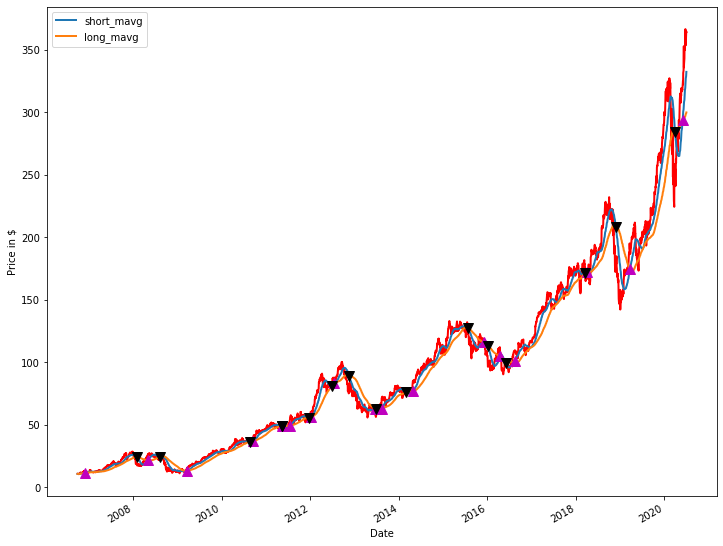

In [79]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2., figsize = (12,10))

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

## Backtesting The Trading Strategy

### Backtesting Pitfalls

Backtesting is, besides just “testing a trading strategy”, testing the strategy on relevant historical data to make sure that it’s an actual viable strategy before you start making moves. With backtesting, a trader can simulate and analyze the risk and profitability of trading with a specific strategy over a period of time. However, when you’re backtesting, it’s a good idea to keep in mind that there are some pitfalls, which might not be obvious to you when you’re just starting out.

For example, there are external events, such as market regime shifts, which are regulatory changes or macroeconomic events, which definitely influence your backtesting. Also, liquidity constraints, such as the ban of short sales, could affect your backtesting heavily.

Next, there are pitfalls which you might introduce yourself when you, for example, overfit a model (optimization bias), when you ignore strategy rules because you think it’s better like that (interference), or when you accidentally introduce information into past data (lookahead bias).

* Market regime shift - Regulatory change, macroeconomic events, “black swans”
* Transaction costs - Unrealistic handling of slippage, market impact and fees
* Liquidity constraints - Ban of short sales (e.g. finance stocks in 2008)
* Optimisation Bias - Over-fitting a model too closely to limited data
* Survivorship Bias - Only using instruments which still exist (incorrect sample)
* Lookahead Bias - Accidental introduction of future information into past data
* Interference - Ignoring strategy rules “just this once” because “I know better”

### Backtesting Components

Besides the pitfalls, it’s good to know that your backtester usually consists of some four essential components, which should usually present in every backtester:

* A data handler, which is an interface to a set of data,
* A strategy, which generates a signal to go long or go short based on the data,
* A portfolio, which generates orders and manages Profit & Loss (also known as “PnL”), and
* An execution handler, which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

### Types of backtesting

| Research | Implementation |
| -------- | -------------- |
| Rapid prototyping | Extensive development and testing time |
| Many strategies/parameters can be tested quickly | Full order management system (OMS) |
| Identifying statistical relationships | Often event-driven or CEP |
| Vectorised (pandas, MatLab or R) | Code-reuse between live implementation and backtesting |
| Often unrealistic (inflated) performance | More realistic performance |

## Python tools

1. Pandas - **Provides the DataFrame, highly useful for “data wrangling” of time series data. Takes a lot of the work out of pre-processing financial data.**
2. Numpy/SciPy - **Provide vectorised operations, optimisation and linear algebra routines all needed for certain trading strategies**
4. SciKit Learn - **Machine Learning library useful for creating regression and classification models, that are used in forecasting strategies**
5. Statsmodels - **Statistical library (contains packages similar to R). Highly useful for time series analysis for mean-reversion/momentum detection.**
6. IbPy **(Python API for Interactive Brokers online trading system: connect to Interactive Brokers, request ticker data, submit orders,…)**
7. ZipLine **(The latter is an all-in-one Python backtesting framework that powers Quantopian, which you’ll use in this tutorial.)**

## Steps to create portfolio

* First off, you’ll create set a variable initial_capital to set your initial capital and a new DataFrame positions. Once again, you copy the index from another DataFrame; In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signals.

* Next, you create a new column AAPL in the DataFrame. On the days that the signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), you’ll buy a 100 shares. The days on which the signal is 0, the final result will be 0 as a result of the operation 100*signals['signal'].

* A new DataFrame portfolio is created to store the market value of an open position.

* Next, you create a DataFrame that stores the differences in positions (or number of stock)

* Then the real backtesting begins: you create a new column to the portfolio DataFrame with name holdings, which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.

* Your portfolio also contains a cash column, which is the capital that you still have left to spend: it is calculated by taking your initial_capital and subtracting your holdings (the price that you paid for buying stock).

* You’ll also add a total column to your portfolio DataFrame, which contains the sum of your cash and the holdings that you own, and

* Lastly, you also add a returns column to your portfolio, in which you’ll store the returns

In [80]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0  100000.0  100000.0      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      0.0
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


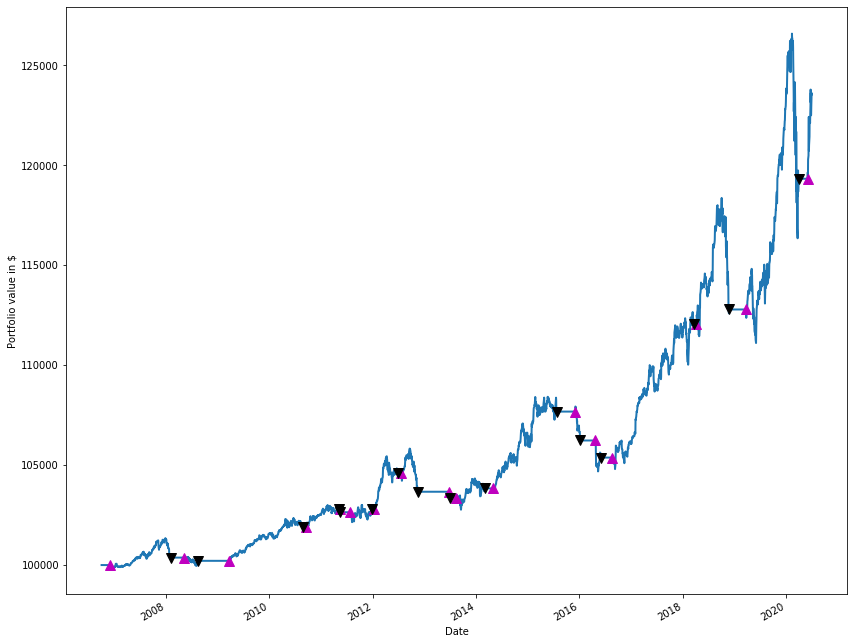

In [85]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2., figsize=(14,12))

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

### Calculating sharpe ration to evaluate algo performance

In [87]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.5549849498739141


### Maximum drawdown

It is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy.

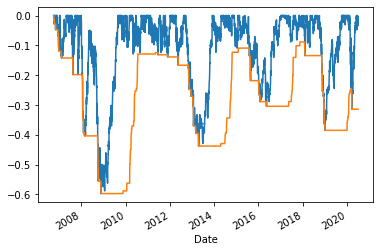

In [88]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

It provides you with a constant rate of return over the time period. In other words, the rate tells you what you really have at the end of your investment period. You can calculate this rate by first dividing the investments ending value (EV) by the investment’s beginning value (BV). You raise the result to the power of 1/n, where n is the number of periods. You subtract 1 from the consequent result and there’s your CAGR!

Maybe a formula is more clear:

(EV/BV)1/n−1

In [89]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.30694695744210954
